In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from ttest import ttest

In [2]:
### Import all CSV into dataframes
file_path = "Resources/SAT Scores.csv"
# SAT SCORES
sat_df = pd.read_csv(file_path,encoding = "ISO-8859-1")
file_path = "Resources/Teacher Expectation.csv"
# TEACHER EXPECTATION
expect_df = pd.read_csv(file_path,encoding = "ISO-8859-1") 
# INCOME
file_path = "Resources/kaggle_income_2017.csv"
income_df = pd.read_csv(file_path,encoding = "ISO-8859-1") 
# SAFETY
file_path = "Resources/Safety.csv"
safe_df = pd.read_csv(file_path,encoding = "ISO-8859-1")
# PRINCIPAL LEADERSHIP
file_path = "Resources/principal_rating.csv"
principal_scores = pd.read_csv(file_path)
# CLEANLINESS
file_path = "Resources/Cleanliness.csv"
clean_df = pd.read_csv(file_path,encoding = "ISO-8859-1")
# CURRICULUM
file_path = "Resources/Curriculum File.csv"
curr_df = pd.read_csv(file_path,encoding = "ISO-8859-1")
# SLT
file_path = "Resources/SLT File.csv"
slt_df = pd.read_csv(file_path,encoding = "ISO-8859-1")
# LOYALTY
file_path = "Resources/Loyalty File.csv"
loyal_df = pd.read_csv(file_path,encoding = "ISO-8859-1")
# TEACHER IMPROVEMENT
file_path = "Resources/Teacher Improving.csv"
improv_df = pd.read_csv(file_path,encoding = "ISO-8859-1")
# MATH AND READING COMBINED SCORE
sat_df["Math and Reading"] = sat_df["Average Score (SAT Math)"]+sat_df["Average Score (SAT Reading)"]

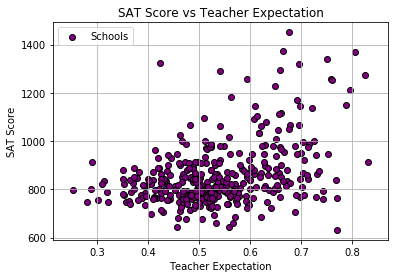

In [34]:
### SAT VS TEACHER EXPECTATION
merge_df = sat_df.merge(expect_df,how = "inner",on = "DBN")
x_axis = merge_df["Teacher Expectation"]
y_axis = merge_df["Math and Reading"]
plt.scatter(x_axis,y_axis,edgecolor = "black",color="purple",marker="o", label='Schools')
plt.grid()
plt.xlabel("Teacher Expectation")
plt.ylabel("SAT Score")
plt.title("SAT Score vs Teacher Expectation")
plt.legend(loc='upper left')
plt.savefig("SAT vs Teacher Expectation.png")
plt.show()

In [4]:
pval = ttest(x_axis,y_axis)
cor = x_axis.corr(y_axis)
print(f'Correlation: {cor} \nP-Value: {pval}')

Correlation: 0.4002497800548587 
P-Value: 8.033038241715299e-16


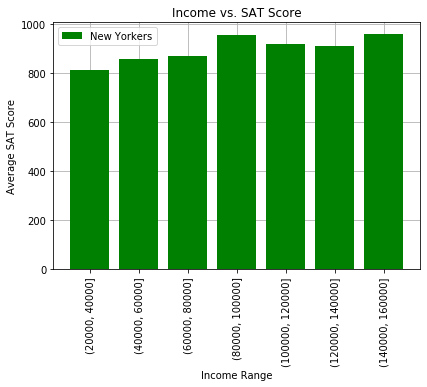

In [35]:
### SAT VS INCOME BY ZIP CODE
# GROUP BY ZIP CODE
satgb_zip = sat_df.groupby("Zip Code")
incomegb_zip = income_df.groupby("Zip_Code")
# MERGE BY ZIP CODE
sat_score = satgb_zip["Math and Reading"].mean().reset_index()
income_mean = incomegb_zip["Mean"].mean().reset_index()

sat_score = pd.DataFrame(sat_score)
income_mean = pd.DataFrame(income_mean)

income_mean = income_mean.rename(columns={"Zip_Code":"Zip Code"})
merge_df = sat_score.merge(income_mean,how = "inner")
# DROP LOWEST INCOME SINCE IT IS THE ONLY ONE OF ITS INCOME GROUP (0-20,000)
merge_df = merge_df.sort_values(by=["Mean"],ascending = True)
merge_df = merge_df.drop(merge_df.index[0])

# BIN DATA BY INCOME GROUP
bin_scale = [0,20000,40000,60000,80000,100000,120000,140000,160000]
merge_df["binned"] = pd.cut(merge_df["Mean"],bin_scale)
gb = merge_df.groupby("binned")
merge_df = gb["Math and Reading"].mean().reset_index()
merge_df["binned"] = merge_df["binned"].astype(str)
# DISPLAY BAR GRAPH
x_axis = merge_df["binned"]
y_axis = merge_df["Math and Reading"]
plt.bar(x_axis,y_axis,align="center",zorder = 2,color = "green", label= "New Yorkers")
plt.tight_layout()
plt.title("Income vs. SAT Score")
plt.legend(loc='upper left')
plt.xlabel("Income Range")
plt.ylabel("Average SAT Score")
plt.xticks(rotation = 90)
plt.grid(zorder=0)
plt.savefig("Income vs SAT Scores.png")
plt.show()


In [6]:
merge_df = income_mean.merge(sat_score,how = "inner",on="Zip Code")
pval = ttest(merge_df["Mean"],merge_df["Math and Reading"])
cor = merge_df["Mean"].corr(merge_df["Math and Reading"])
print(f'Correlation: {cor} \nP-Value: {pval}')

Correlation: 0.31158546520170577 
P-Value: 0.0007392978621716622


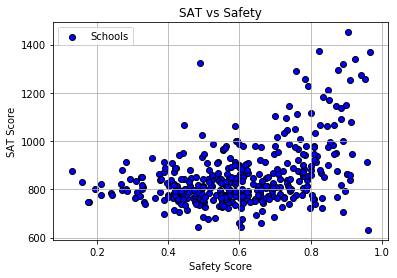

In [36]:
### SAT VS SAFETY
merge_df = safe_df.merge(sat_df,how = "inner", on = "DBN")
x_axis = merge_df["Safety Score"]
y_axis = merge_df["Math and Reading"]
plt.scatter(x_axis,y_axis,edgecolor="black",color="blue",label='Schools')
plt.grid()
plt.xlabel("Safety Score")
plt.ylabel("SAT Score")
plt.title("SAT vs Safety")
plt.legend(loc='best')
plt.savefig("SAT vs School Safety.png")
plt.show()


In [8]:
pval = ttest(x_axis,y_axis)
cor = x_axis.corr(y_axis)
print(f'Correlation: {cor} \nP-Value: {pval}')

Correlation: 0.43236962051035804 
P-Value: 1.811613707673033e-18


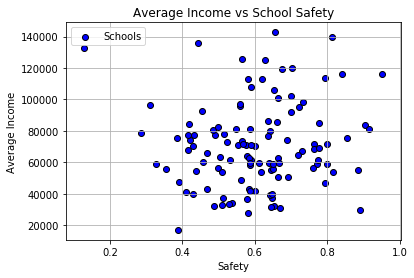

In [37]:
# COMPARE SAFETY AND INCOME
safe_zip = pd.DataFrame(merge_df.groupby("Zip Code").mean())
safe_inc_zip = safe_zip.merge(income_mean,how="inner",on="Zip Code")
x_axis = safe_inc_zip["Safety Score"]
y_axis = safe_inc_zip["Mean"]
plt.scatter(x_axis,y_axis,edgecolor = "black",color = "blue", label='Schools')
plt.grid()
plt.xlabel("Safety")
plt.ylabel("Average Income")
plt.title("Average Income vs School Safety")
plt.legend(loc='best')
plt.savefig("Income vs School Safety.png")
plt.show()


In [10]:
pval = ttest(safe_inc_zip["Mean"],safe_inc_zip["Safety Score"])
cor = safe_inc_zip["Mean"].corr(safe_inc_zip["Safety Score"])
print(f'Correlation: {cor} \nP-Value: {pval}')

Correlation: 0.08892639889019811 
P-Value: 0.34676839848532626


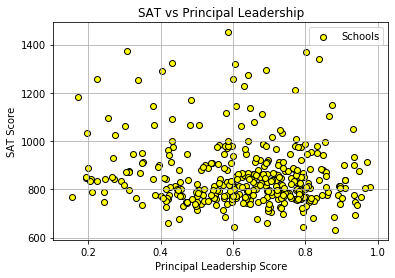

In [39]:
### SAT VS PRINCIPAL LEADERSHIP
merge_df = sat_df.merge(principal_scores,how = "inner",on = "DBN")
x_axis = merge_df["How good is principal?"]
y_axis = merge_df["Math and Reading"]
plt.scatter(x_axis,y_axis,edgecolor = "black", marker = "o",color = "yellow", label='Schools')
plt.title("SAT vs Principal Leadership")
plt.xlabel("Principal Leadership Score")
plt.ylabel("SAT Score")
plt.legend(loc='best')
plt.grid()
plt.savefig("SAT vs Principal Leadership.png")
plt.show()


In [12]:
pval = ttest(x_axis,y_axis)
cor = x_axis.corr(y_axis)
print(f'Correlation: {cor} \nP-Value: {pval}')

Correlation: -0.13067528386613786 
P-Value: 0.011311099575489682


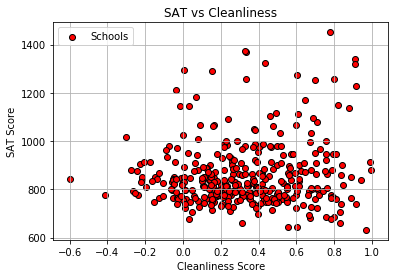

In [40]:
### SAT VS CLEANLINESS
merge_df = sat_df.merge(clean_df,how = "inner",on = "DBN")
x_axis = merge_df["Cleanliness"]
y_axis = merge_df["Math and Reading"]
plt.scatter(x_axis,y_axis,edgecolor = "black",color="red", label='Schools')
plt.xlabel("Cleanliness Score")
plt.ylabel("SAT Score")
plt.title("SAT vs Cleanliness")
plt.legend(loc='best')
plt.grid()
plt.savefig("SAT vs Cleanliness.png")
plt.show()


In [14]:
pval = ttest(x_axis,y_axis)
cor = x_axis.corr(y_axis)
print(f'Correlation: {cor} \nP-Value: {pval}')

Correlation: 0.09085555847421367 
P-Value: 0.07929142992357019


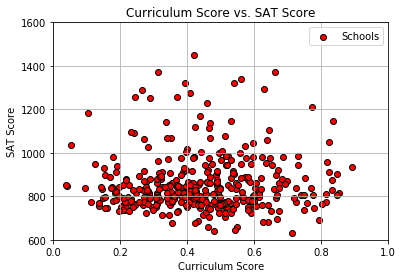

In [41]:
### SAT VS CURRICULUM MANAGEMENT
merge_df = sat_df.merge(curr_df,how="inner",on = "DBN")
x_axis = merge_df["Curved Curriculum Score"]
y_axis = merge_df["Math and Reading"]
# Plot
plt.scatter(x_axis, y_axis, marker="o",facecolors="red", edgecolors="black", label='Schools')
plt.grid()
# Set the upper and lower limits of our y axis
plt.ylim(600, 1600)
# Set the upper and lower limits of our x axis
plt.xlim(0,1)
# Create a title, x label, and y label for our chart
plt.title("Curriculum Score vs. SAT Score")
plt.xlabel("Curriculum Score")
plt.ylabel("SAT Score")
plt.legend(loc='upper right')
# Save an image of the chart and print to screen
plt.savefig("SAT vs Curriculum Consistency.png")
plt.show()


In [16]:
pval = ttest(x_axis,y_axis)
cor = x_axis.corr(y_axis)
print(f'Correlation: {cor} \nP-Value: {pval}')

Correlation: 0.03502417878536797 
P-Value: 0.4989241365781374


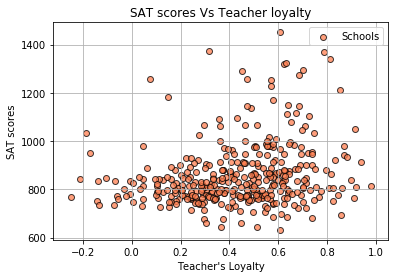

In [42]:
### SAT vs Loyalty
merge_df = sat_df.merge(loyal_df, how='inner', on = "DBN")
x_axis = merge_df["Curved Loyalty Score"]
y_axis = merge_df["Math and Reading"]
plt.scatter(x_axis, y_axis, marker="o", alpha=0.75, facecolors="Coral", edgecolors="black", label='Schools')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel("Teacher's Loyalty")
plt.ylabel('SAT scores')
plt.title('SAT scores Vs Teacher loyalty')
plt.savefig("SAT vs Teacher Loyalty.png")
plt.show()

In [18]:
pval = ttest(x_axis,y_axis)
cor = x_axis.corr(y_axis)
print(f'Correlation: {cor} \nP-Value: {pval}')

Correlation: 0.22190230423250315 
P-Value: 1.4446536586916571e-05


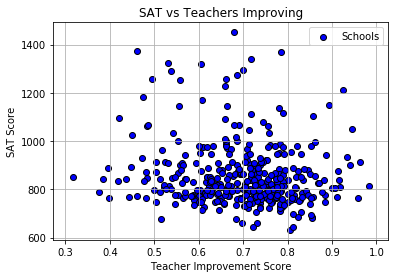

In [43]:
### SAT vs TEACHERS IMPROVING
merge_df = sat_df.merge(improv_df,how="inner",on="DBN")
x_axis = merge_df["Curved Teacher Improvement"]
y_axis = merge_df["Math and Reading"]
plt.scatter(x_axis,y_axis,edgecolor= "black",color = "blue", label="Schools")
plt.xlabel("Teacher Improvement Score")
plt.ylabel("SAT Score")
plt.title("SAT vs Teachers Improving")
plt.legend(loc='best')
plt.grid()
plt.savefig("SAT vs Teachers Improving.png")
plt.show()

In [20]:
pval = ttest(x_axis,y_axis)
cor = x_axis.corr(y_axis)
print(f'Correlation: {cor} \nP-Value: {pval}')

Correlation: -0.13158278204828547 
P-Value: 0.0107512271068098
